In [2]:
#%pip install pybaseball;
import os
import re
import csv
import math
#import tweepy # %pip install tweepy
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import matplotlib.patches as patches
import seaborn as sns
from datetime import date, timedelta
import datetime as dt
#import statsapi # %pip install MLB-StatsAPI
#from pybaseball import statcast

In [3]:
# Suppress Pandas Warnings
import warnings
warnings.simplefilter(action='ignore')

# data research

In [4]:
#read saved csv file

In [5]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory

In [6]:
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Shane\\baseball ml': ['.ipynb_checkpoints', '5 year inning info.ipynb', '5 year pitch type info.ipynb', '5 year raw download data', '5 year raw download data with only called pitches and call type', 'Copy of Automate.ipynb', 'data processing.py', 'output.csv', 'Umpscores_Weather.ipynb', 'weather analysis.ipynb']


In [7]:
df = pd.read_csv('5 year raw download data with only called pitches and call type', sep='\t', encoding='utf-8')
df['inning'].value_counts()

1     193111
2     184011
3     183784
7     182729
6     181757
8     181379
5     179076
4     178302
9     135574
10     13391
11      5678
12      2535
13      1383
14       699
15       444
16       230
18        94
17        91
19        15
Name: inning, dtype: int64

In [8]:
display(df["call"].value_counts())

correct      1500923
incorrect     123360
Name: call, dtype: int64

Class 0: 1500923
Class 1: 123360
Proportion: 12.17 : 1


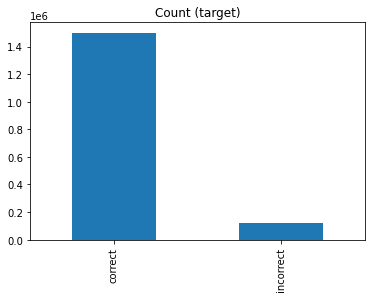

In [9]:
target_count = df['call'].value_counts()
print('Class 0:', target_count["correct"])
print('Class 1:', target_count["incorrect"])
print('Proportion:', round(target_count["correct"] / target_count["incorrect"], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [10]:
display(df["game_year"].value_counts())

2019    372345
2022    371246
2021    370806
2018    367511
2020    142375
Name: game_year, dtype: int64

In [11]:
#mark call column correct call as 0 , incorrect as 1
df.loc[df["call"] == "incorrect", "call"] = 1
df.loc[df["call"] == "correct", "call"] = 0

In [12]:
print('5 year BCR: ',df['call'].mean())

5 year BCR:  0.07594735646435996


In [13]:
bcr_info = df[["call","game_year"]]
bcr_info.groupby("game_year").mean()

,call
game_year,
2018,0.082022
2019,0.078642
2020,0.076116
2021,0.073087
2022,0.070024


# regular inning 1-9 data

In [14]:
df1 = df[["call","inning"]].loc[df["inning"] <= 9]

In [15]:
df1['inning'].value_counts()

1    193111
2    184011
3    183784
7    182729
6    181757
8    181379
5    179076
4    178302
9    135574
Name: inning, dtype: int64

In [16]:
df1_bcr = df1.groupby("inning").mean()

In [17]:
df1_bcr

,call
inning,
1,0.077199
2,0.075762
3,0.076731
4,0.077767
5,0.074739
6,0.074864
7,0.076260
8,0.074744
9,0.075442


In [18]:
#best inning happens at 9, worst inning happens at 4

In [19]:
print("Avg BCR for the  9 innings is")
(0.077199+0.075762+0.076731+0.077767+0.074739+0.074864+0.076260+0.074744+0.075442)/9

Avg BCR for the  9 innings is


0.07594533333333335

In [20]:
df1.groupby("inning").mean()/0.07594533333333335

,call
inning,
1,1.016509
2,0.997583
3,1.010350
4,1.023986
5,0.984119
6,0.985758
7,1.004150
8,0.984182
9,0.993375


In [ ]:
"innings have no impact on BCR"

# bcr_inning by early, mid and late game

In [21]:
early = df[["call"]].loc[df["inning"] <= 3]

In [22]:
early.mean()

call    0.076574
dtype: float64

In [23]:
inn4 = df[["call"]].loc[df["inning"] == 4]
inn5 = df[["call"]].loc[df["inning"] == 5]
inn6 = df[["call"]].loc[df["inning"] == 6]
display(inn4.value_counts())
display(inn5.value_counts())
display(inn6.value_counts())

(13865+13384+13606)/ (len(inn4)+len(inn5)+len(inn6))

call
0       164436
1        13866
dtype: int64

call
0       165692
1        13384
dtype: int64

call
0       168150
1        13607
dtype: int64

0.07577879380860081

In [24]:
inn7 = df[["call"]].loc[df["inning"] == 7]
inn8 = df[["call"]].loc[df["inning"] == 8]
inn9 = df[["call"]].loc[df["inning"] == 9]
display(inn7.value_counts())
display(inn8.value_counts())
display(inn9.value_counts())

(13936+13556+10227)/ (len(inn7)+len(inn8)+len(inn9))

call
0       168794
1        13935
dtype: int64

call
0       167822
1        13557
dtype: int64

call
0       125346
1        10228
dtype: int64

0.07548600910178874

In [25]:
#bad call ratio decreases as it gets to later of the game

# bcr_inning by year

In [26]:
#2018
df2018 = df[["call","inning"]].loc[df["game_year"] ==2018]
display(df2018['call'].value_counts())
display(df2018.groupby("inning").mean())
#year 2018, best inning at 5, worst inning at 4

0    337367
1     30144
Name: call, dtype: int64

,call
inning,
1,0.083333
2,0.084167
3,0.081948
4,0.084338
5,0.078913
6,0.081308
7,0.081419
8,0.080142
9,0.083015


In [27]:
inn1 = df2018[["call"]].loc[df2018["inning"] == 1]
inn2 = df2018[["call"]].loc[df2018["inning"] == 2]
inn3 = df2018[["call"]].loc[df2018["inning"] == 3]
display(inn1.value_counts())
display(inn2.value_counts())
display(inn3.value_counts())
display("BCR at early game")
display((3667+3485+3377)/ (len(inn1)+len(inn2)+len(inn3)))

inn4 = df2018[["call"]].loc[df2018["inning"] == 4]
inn5 = df2018[["call"]].loc[df2018["inning"] == 5]
inn6 = df2018[["call"]].loc[df2018["inning"] == 6]
display(inn4.value_counts())
display(inn5.value_counts())
display(inn6.value_counts())
display("BCR at mid game")
display((3378+3161+3269)/ (len(inn4)+len(inn5)+len(inn6)))

inn7 = df2018[["call"]].loc[df2018["inning"] == 7]
inn8 = df2018[["call"]].loc[df2018["inning"] == 8]
inn9 = df2018[["call"]].loc[df2018["inning"] == 9]
display(inn7.value_counts())
display(inn8.value_counts())
display(inn9.value_counts())
display("BCR at end game")
(3317+3300+2585)/ (len(inn7)+len(inn8)+len(inn9))

call
0       40337
1        3667
dtype: int64

call
0       37921
1        3485
dtype: int64

call
0       37832
1        3377
dtype: int64

'BCR at early game'

0.08315497674124736

call
0       36675
1        3378
dtype: int64

call
0       36896
1        3161
dtype: int64

call
0       36936
1        3269
dtype: int64

'BCR at mid game'

0.08151934505257033

call
0       37423
1        3317
dtype: int64

call
0       37877
1        3300
dtype: int64

call
0       28554
1        2585
dtype: int64

'BCR at end game'

0.08139329181998302

In [28]:
#2019
df2019 = df[["call","inning"]].loc[df["game_year"] ==2019]
display(df2019['call'].value_counts())
display(df2019.groupby("inning").mean())
#year 2019, best inning at 9, worst inning at 3

0    343063
1     29282
Name: call, dtype: int64

,call
inning,
1,0.079823
2,0.076490
3,0.081113
4,0.081515
5,0.078039
6,0.077370
7,0.081193
8,0.076818
9,0.075301


In [29]:
inn1 = df2019[["call"]].loc[df2019["inning"] == 1]
inn2 = df2019[["call"]].loc[df2019["inning"] == 2]
inn3 = df2019[["call"]].loc[df2019["inning"] == 3]
display(inn1.value_counts())
display(inn2.value_counts())
display(inn3.value_counts())
display("BCR at early game")
display((3506+3190+3400)/ (len(inn1)+len(inn2)+len(inn3)))

inn4 = df2019[["call"]].loc[df2019["inning"] == 4]
inn5 = df2019[["call"]].loc[df2019["inning"] == 5]
inn6 = df2019[["call"]].loc[df2019["inning"] == 6]
display(inn4.value_counts())
display(inn5.value_counts())
display(inn6.value_counts())
display("BCR at mid game")
display((3272+3142+3207)/ (len(inn4)+len(inn5)+len(inn6)))

inn7 = df2019[["call"]].loc[df2019["inning"] == 7]
inn8 = df2019[["call"]].loc[df2019["inning"] == 8]
inn9 = df2019[["call"]].loc[df2019["inning"] == 9]
display(inn7.value_counts())
display(inn8.value_counts())
display(inn9.value_counts())
display("BCR at end game")
(3377+3215+2403)/ (len(inn7)+len(inn8)+len(inn9))

call
0       40416
1        3506
dtype: int64

call
0       38515
1        3190
dtype: int64

call
0       38517
1        3400
dtype: int64

'BCR at early game'

0.07915699680110393

call
0       36868
1        3272
dtype: int64

call
0       37120
1        3142
dtype: int64

call
0       38243
1        3207
dtype: int64

'BCR at mid game'

0.07895643895873683

call
0       38215
1        3377
dtype: int64

call
0       38637
1        3215
dtype: int64

call
0       29509
1        2403
dtype: int64

'BCR at end game'

0.0779760047158362

In [30]:
#2020
df2020 = df[["call","inning"]].loc[df["game_year"] ==2020]
display(df2020['call'].value_counts())
display(df2020.groupby("inning").mean())
#year 2020, best inning at 8, worst inning at 3

0    131538
1     10837
Name: call, dtype: int64

,call
inning,
1,0.075932
2,0.078592
3,0.080460
4,0.075957
5,0.074887
6,0.073659
7,0.077966
8,0.070745
9,0.075687


In [31]:
inn1 = df2020[["call"]].loc[df2020["inning"] == 1]
inn2 = df2020[["call"]].loc[df2020["inning"] == 2]
inn3 = df2020[["call"]].loc[df2020["inning"] == 3]
display(inn1.value_counts())
display(inn2.value_counts())
display(inn3.value_counts())
display("BCR at early game")
display((1309+1282+1344)/ (len(inn1)+len(inn2)+len(inn3)))

inn4 = df2020[["call"]].loc[df2020["inning"] == 4]
inn5 = df2020[["call"]].loc[df2020["inning"] == 5]
inn6 = df2020[["call"]].loc[df2020["inning"] == 6]
display(inn4.value_counts())
display(inn5.value_counts())
display(inn6.value_counts())
display("BCR at mid game")
display((1240+1214+1217)/ (len(inn4)+len(inn5)+len(inn6)))

inn7 = df2020[["call"]].loc[df2020["inning"] == 7]
inn8 = df2020[["call"]].loc[df2020["inning"] == 8]
inn9 = df2020[["call"]].loc[df2020["inning"] == 9]
display(inn7.value_counts())
display(inn8.value_counts())
display(inn9.value_counts())
display("BCR at end game")
(1265+1043+810)/ (len(inn7)+len(inn8)+len(inn9))

call
0       15930
1        1309
dtype: int64

call
0       15030
1        1282
dtype: int64

call
0       15360
1        1344
dtype: int64

'BCR at early game'

0.07830066660033827

call
0       15085
1        1240
dtype: int64

call
0       14997
1        1214
dtype: int64

call
0       15305
1        1217
dtype: int64

'BCR at mid game'

0.07482979330588284

call
0       14960
1        1265
dtype: int64

call
0       13700
1        1043
dtype: int64

call
0       9892
1        810
dtype: int64

'BCR at end game'

0.07482601391888649

In [32]:
#2021
df2021 = df[["call","inning"]].loc[df["game_year"] ==2021]
display(df2021['call'].value_counts())
display(df2021.groupby("inning").mean())
#year 2021, best inning at 5, worst inning at 1

0    343705
1     27101
Name: call, dtype: int64

,call
inning,
1,0.075249
2,0.073264
3,0.073749
4,0.073336
5,0.071288
6,0.072558
7,0.072860
8,0.072642
9,0.073497


In [33]:
inn1 = df2021[["call"]].loc[df2021["inning"] == 1]
inn2 = df2021[["call"]].loc[df2021["inning"] == 2]
inn3 = df2021[["call"]].loc[df2021["inning"] == 3]
display(inn1.value_counts())
display(inn2.value_counts())
display(inn3.value_counts())
display("BCR at early game")
display((3306+3107+3101)/ (len(inn1)+len(inn2)+len(inn3)))

inn4 = df2021[["call"]].loc[df2021["inning"] == 4]
inn5 = df2021[["call"]].loc[df2021["inning"] == 5]
inn6 = df2021[["call"]].loc[df2021["inning"] == 6]
display(inn4.value_counts())
display(inn5.value_counts())
display(inn6.value_counts())
display("BCR at mid game")
display((3016+2964+3056)/ (len(inn4)+len(inn5)+len(inn6)))

inn7 = df2021[["call"]].loc[df2021["inning"] == 7]
inn8 = df2021[["call"]].loc[df2021["inning"] == 8]
inn9 = df2021[["call"]].loc[df2021["inning"] == 9]
display(inn7.value_counts())
display(inn8.value_counts())
display(inn9.value_counts())
display("BCR at end game")
(3062+3006+2218)/ (len(inn7)+len(inn8)+len(inn9))

call
0       40628
1        3306
dtype: int64

call
0       39301
1        3107
dtype: int64

call
0       38947
1        3101
dtype: int64

'BCR at early game'

0.07410234441934731

call
0       38110
1        3016
dtype: int64

call
0       38614
1        2964
dtype: int64

call
0       39062
1        3056
dtype: int64

'BCR at mid game'

0.07239108490490459

call
0       38964
1        3062
dtype: int64

call
0       38375
1        3006
dtype: int64

call
0       27960
1        2218
dtype: int64

'BCR at end game'

0.07294977329753048

In [34]:
#2022
df2022 = df[["call","inning"]].loc[df["game_year"] ==2022]
display(df2022['call'].value_counts())
display(df2022.groupby("inning").mean())
#year 2022, best inning at 6, worst inning at 4

0    345250
1     25996
Name: call, dtype: int64

,call
inning,
1,0.070890
2,0.068208
3,0.068725
4,0.072802
5,0.070860
6,0.068931
7,0.069141
8,0.070881
9,0.069905


In [35]:
inn1 = df2022[["call"]].loc[df2022["inning"] == 1]
inn2 = df2022[["call"]].loc[df2022["inning"] == 2]
inn3 = df2022[["call"]].loc[df2022["inning"] == 3]
display(inn1.value_counts())
display(inn2.value_counts())
display(inn3.value_counts())
display("BCR at early game")
display((3120+2877+2880)/ (len(inn1)+len(inn2)+len(inn3)))

inn4 = df2022[["call"]].loc[df2022["inning"] == 4]
inn5 = df2022[["call"]].loc[df2022["inning"] == 5]
inn6 = df2022[["call"]].loc[df2022["inning"] == 6]
display(inn4.value_counts())
display(inn5.value_counts())
display(inn6.value_counts())
display("BCR at mid game")
display((2960+2903+2858)/ (len(inn4)+len(inn5)+len(inn6)))

inn7 = df2022[["call"]].loc[df2022["inning"] == 7]
inn8 = df2022[["call"]].loc[df2022["inning"] == 8]
inn9 = df2022[["call"]].loc[df2022["inning"] == 9]
display(inn7.value_counts())
display(inn8.value_counts())
display(inn9.value_counts())
display("BCR at end game")
(2914+2993+2212)/ (len(inn7)+len(inn8)+len(inn9))

call
0       40892
1        3120
dtype: int64

call
0       39303
1        2877
dtype: int64

call
0       39026
1        2880
dtype: int64

'BCR at early game'

0.06929850583147278

call
0       37698
1        2960
dtype: int64

call
0       38065
1        2903
dtype: int64

call
0       38604
1        2858
dtype: int64

'BCR at mid game'

0.07085174834264917

call
0       39232
1        2914
dtype: int64

call
0       39233
1        2993
dtype: int64

call
0       29431
1        2212
dtype: int64

'BCR at end game'

0.06998232987113735

# extra inning

In [36]:
df2 = df[["call","inning"]].loc[df["inning"] >= 9]

In [37]:
df2

,call,inning
0,0,9
119,0,9
120,0,9
121,1,9
122,0,9
...,...,...
1624138,0,9
1624139,0,9
1624140,0,9
1624141,0,9


In [38]:
df2['inning'].value_counts()

9     135574
10     13391
11      5678
12      2535
13      1383
14       699
15       444
16       230
18        94
17        91
19        15
Name: inning, dtype: int64

In [39]:
extra_bcr = df2.groupby("inning").mean()

In [40]:
extra_bcr

,call
inning,
9,0.075442
10,0.073632
11,0.076259
12,0.082051
13,0.070137
14,0.055794
15,0.078829
16,0.095652
17,0.021978


In [41]:
display(df1["call"].value_counts())
#regular inning 5 year bcr
df1["call"].mean()

0    1478195
1     121528
Name: call, dtype: int64

0.07596815198631263

In [42]:
df1["call"].std()

0.2649472320120392

In [43]:
display(df2["call"].value_counts())
#extra inning 5 year bcr
df2["call"].mean()

0    148074
1     12060
Name: call, dtype: int64

0.07531192626175578

In [44]:
df2["call"].std()

0.2638948178976778

In [45]:
#there is no evidence that extra innings cost performance

In [46]:
#what if remove the outliers and only include inning 10-14?

In [47]:
df3 = df2[["call","inning"]].loc[df2["inning"] <= 14]

In [48]:
display(df3["call"].value_counts())

0    147269
1     11991
Name: call, dtype: int64

In [49]:
df3['call'].mean()

0.07529197538616099

In [50]:
#there is no evidence that extra innings cost performance